# S05 T01: Transformació Registre Log amb Regular expressions

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
#Graphs etc. are drawn in Notebook
%matplotlib inline

#Changed the maximum string length of DataFrame columns and rows
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 100)

# Necessary for maps
import numpy as np
import cartopy
import sys
from itertools import combinations
from datetime import datetime
import random
import warnings

import pytz

## Exercise 1 Import data and generates table, estandardize, identify and enumerate each atribute

In [2]:
# Functions for parsing
def parse_str(x):
    return x[1:-1]

def parse_datetime(x):
    dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
    dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
    return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))

In [3]:
# Import data and generates table, estandardize, identify and enumerate each atribute
data = pd.read_csv('Web_access_log-akumenius.com.txt',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    engine='python',
    na_values="-",
    header=None,
    usecols=[0, 1, 4, 5, 6, 7, 8, 9],
    names=['host','ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'time': parse_datetime,
                'response_time': int,
                'request': parse_str,
                'status': int,
                'size': int,
                'user_agent': parse_str})

data

,host,ip,time,request,status,size,referer,user_agent
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,"""-""",Apache (internal dummy connection)
1,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,"""-""",Apache (internal dummy connection)
2,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,"""-""",Apache (internal dummy connection)
3,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,"""-""",Apache (internal dummy connection)
4,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,"""-""",Apache (internal dummy connection)
5,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,"""-""",Apache (internal dummy connection)
6,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,"""-""",Apache (internal dummy connection)
7,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,"""-""",Apache (internal dummy connection)
8,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,"""-""",Apache (internal dummy connection)
9,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,"""-""",Apache (internal dummy connection)


## Exercise 2 Clean, process, estructure and transform dataframe

In [4]:
# Exploring dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype                               
---  ------      --------------   -----                               
 0   host        261873 non-null  object                              
 1   ip          261873 non-null  object                              
 2   time        261873 non-null  datetime64[ns, pytz.FixedOffset(60)]
 3   request     261836 non-null  object                              
 4   status      261873 non-null  int64                               
 5   size        219538 non-null  object                              
 6   referer     261873 non-null  object                              
 7   user_agent  261654 non-null  object                              
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), int64(1), object(6)
memory usage: 16.0+ MB


In [5]:
data.isnull().sum()

host              0
ip                0
time              0
request          37
status            0
size          42335
referer           0
user_agent      219
dtype: int64

In [6]:
# Drop NaN from Request
data.request.dropna()

0                                                                                                                                      OPTIONS * HTTP/1.0
1                                                                                                                                      OPTIONS * HTTP/1.0
2                                                                                                                                      OPTIONS * HTTP/1.0
3                                                                                                                                      OPTIONS * HTTP/1.0
4                                                                                                                                      OPTIONS * HTTP/1.0
5                                                                                                                                      OPTIONS * HTTP/1.0
6                                                                           

In [7]:
# Drop duplicates
data.duplicated().sum()

4563

There are no duplicates

In [8]:
# Drop "localhost"
df=data.copy()

In [9]:
df[df["host"].str.contains("localhost") == False] 

,host,ip,time,request,status,size,referer,user_agent
22,www.akumenius.com,66.249.76.216,2014-02-23 03:10:31+01:00,GET /hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html HTTP/1.1,404,3100,"""-""",Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)
23,www.akumenius.com,66.249.76.216,2014-02-23 03:10:33+01:00,GET /hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html HTTP/1.1,404,3100,"""-""",Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)
24,www.akumenius.com,66.249.76.216,2014-02-23 03:10:35+01:00,GET /hoteles-baratos/ofertas-hotel-Faena-Hotel-Buenos-Aires-en-Downtown-129723b-destinos.html HTTP/1.1,404,3100,"""-""",Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)
25,www.akumenius.com,66.249.76.216,2014-02-23 03:10:38+01:00,GET /hoteles-baratos/ofertas-hotel-Kensington-Townhouse-London-en-Kensington-54356b-destinos.html HTTP/1.1,404,3100,"""-""",Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)
26,www.akumenius.com,66.249.76.216,2014-02-23 03:10:39+01:00,GET /destinos-baratos/destinosEstrelles/hoteles-en-Invermere_CANAD%C3%81-con-4-estrellas HTTP/1.1,200,8811,"""-""",Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)
27,www.akumenius.com,66.249.76.216,2014-02-23 03:10:40+01:00,GET /hoteles-baratos/ofertas-hotel-Howard-Jhonson-hotel-&-Spa--Villa-Gral-Belgrano-en-Villa%20General%20Belgrano-146416b-destinos.html HTTP/1.1,404,3100,"""-""",Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)
28,www.akumenius.com,66.249.76.216,2014-02-23 03:10:42+01:00,GET /hoteles-baratos/ofertas-hotel-Princesa-Sofia-en-Diagonal%20S.-4013b-destinos.html HTTP/1.1,404,3100,"""-""",Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)
29,www.akumenius.com,66.249.76.216,2014-02-23 03:10:45+01:00,GET /hoteles-baratos/ofertas-hotel-Kfar-Giladi-en-Tiberias-121085b-destinos.html HTTP/1.1,404,3100,"""-""",Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)
30,www.akumenius.com,66.249.76.216,2014-02-23 03:10:46+01:00,GET /destinos-baratos/destinosEstrelles/hoteles-en-Skanderborg_DINAMARCA-con-5-estrellas HTTP/1.1,200,8816,"""-""",Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)
31,www.akumenius.com,66.249.76.216,2014-02-23 03:10:47+01:00,GET /hoteles-baratos/ofertas-hotel-Casual-Hotel-Valencia-en-Valencia-205435b-destinos.html HTTP/1.1,404,3100,"""-""",Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)


In [10]:
# Print request by %
req= df['request'].value_counts(normalize=True)
req.columns =['request', '%']
req[:50]

OPTIONS * HTTP/1.0                                                                                    0.053056
POST /destinos-get HTTP/1.1                                                                           0.030767
POST /hotel-list-data/ HTTP/1.1                                                                       0.008853
GET / HTTP/1.1                                                                                        0.008463
HEAD / HTTP/1.1                                                                                       0.006580
GET /modules/raton/views/themes/bcoos/images/boto_home_reserva.png HTTP/1.1                           0.006558
GET /includes/images/uploaded/logo.png HTTP/1.1                                                       0.006504
GET /modules/raton/views/themes/bcoos/images/boto_home_planea.png HTTP/1.1                            0.006496
GET /modules/raton/views/themes/bcoos/images/boto_home_elige.png HTTP/1.1                             0.006470
P

In [11]:
# Clean request to see what relevant pages are visited more frequenly.
a=df[['request']].value_counts().rename_axis('web').reset_index(name='counts')
a_2=a[a["web"].str.contains("OPTIONS|module|libraries|raton") == False]
a_2.head(150)

,web,counts
1,POST /destinos-get HTTP/1.1,8056
2,POST /hotel-list-data/ HTTP/1.1,2318
3,GET / HTTP/1.1,2216
4,HEAD / HTTP/1.1,1723
6,GET /includes/images/uploaded/logo.png HTTP/1.1,1703
10,GET /hotel-list HTTP/1.1,1639
13,GET /includes/css/style.css HTTP/1.1,1586
39,GET /icon.png HTTP/1.1,1112
47,GET /hotels-consulted-update HTTP/1.0,1007
52,GET /includes/images/icons/bcoos_next.png HTTP/1.1,861


Visitors are more interested in destinies, hotel lists, cheap hotels and "escapadas".

## Exercise 3 Geolocalisation of IP

In [12]:
# Get a list of unique ip and % of total
ip_2 = df['ip']. value_counts(normalize=True)
ip_2.columns =['ip', '%']
ip_2

66.249.76.216      0.177116
80.28.221.123      0.056230
127.0.0.1          0.053049
217.125.71.222     0.019861
66.249.75.148      0.013587
162.243.192.191    0.011177
62.117.197.230     0.009802
89.128.176.162     0.004174
198.143.133.154    0.003990
176.31.255.177     0.003987
80.58.250.94       0.003983
81.39.110.171      0.003933
80.35.176.249      0.003609
217.12.16.130      0.003425
195.57.124.71      0.003425
84.122.139.8       0.003204
74.86.158.106      0.003192
74.86.158.107      0.003093
66.249.93.141      0.002986
80.37.230.56       0.002849
85.48.148.136      0.002707
188.84.96.240      0.002658
66.249.64.98       0.002608
66.249.64.13       0.002524
92.56.114.50       0.002467
80.39.210.69       0.002417
66.249.64.103      0.002402
79.145.213.52      0.002291
81.35.188.72       0.002119
144.76.95.232      0.002108
                     ...   
54.197.42.180      0.000004
31.4.208.178       0.000004
202.46.55.57       0.000004
184.173.238.166    0.000004
77.37.178.139      0

In [13]:
#Install library for ip geolocation

!pip install pygeoip

In [14]:
import pygeoip
gi = pygeoip.GeoIP('./GeoLiteCity.dat', pygeoip.MEMORY_CACHE)

In [15]:
# Loop to crate a list of dictionaries about IP numbers
ipcon = []
for iip in ip_2.index:
    if gi.record_by_addr(iip):
        rres = gi.record_by_addr(iip)
        rres['ip'] = iip
        rres['Number'] = ip_2[iip]
        ipcon.append(rres)
    else:
        ip_2.drop(labels=[iip])

In [16]:
# Creata IP Data Frame
loc = pd.DataFrame(ipcon)
loc.set_index('ip', inplace=True)
loc.head()

,dma_code,area_code,metro_code,postal_code,country_code,country_code3,country_name,continent,region_code,city,latitude,longitude,time_zone,Number
ip,,,,,,,,,,,,,,
66.249.76.216,807,650,"San Francisco, CA",94043,US,USA,United States,NA,CA,Mountain View,37.4192,-122.0574,America/Los_Angeles,0.177116
80.28.221.123,0,0,None,28850,ES,ESP,Spain,EU,29,Torrejón De Ardoz,40.4554,-3.4697,Europe/Madrid,0.056230
217.125.71.222,0,0,None,41070,ES,ESP,Spain,EU,51,Sevilla,37.3824,-5.9761,Africa/Ceuta,0.019861
66.249.75.148,807,650,"San Francisco, CA",94043,US,USA,United States,NA,CA,Mountain View,37.4192,-122.0574,America/Los_Angeles,0.013587
162.243.192.191,501,212,"New York, NY",10011,US,USA,United States,NA,NY,New York,40.7308,-73.9975,America/New_York,0.011177


### Exercici 4 Geolocalisation of IP using Cartopy based on city and continent

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cartopy

import sys
from itertools import combinations
from datetime import datetime
import random
import warnings
import cartopy.crs as crs
import cartopy.feature as cfeature

warnings.filterwarnings("ignore")

print("Python Version : ", sys.version)
print("Cartopy Version : ", cartopy.__version__)

%matplotlib inline

Python Version :  3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
Cartopy Version :  0.18.0


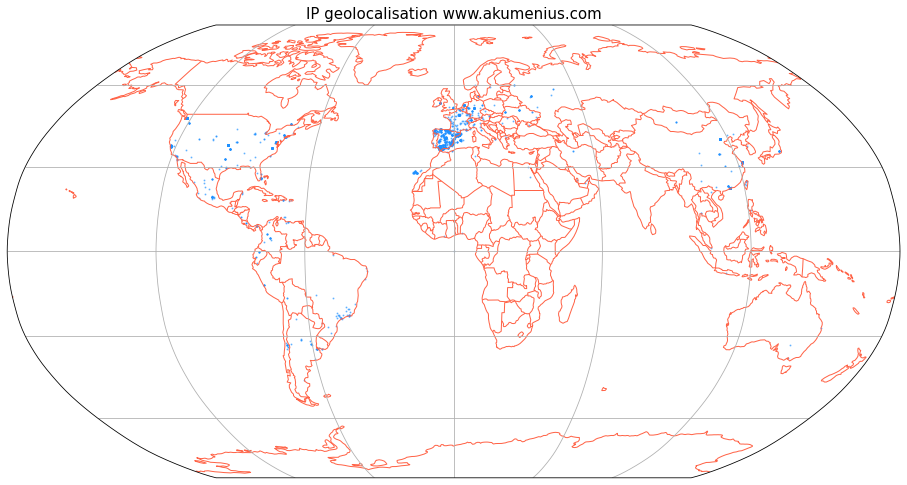

In [18]:
# Plot geolocalisation of unique IP
fig = plt.figure(figsize=(16,14))

ax = fig.add_subplot(1,1,1, projection=crs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=loc.longitude, y=loc.latitude,
            color="dodgerblue",
            s=1,
            alpha=0.5,
            transform=crs.PlateCarree()) ## Important

plt.title("IP geolocalisation www.akumenius.com", loc='center',fontsize = 15)

plt.show()

In [19]:
# Filter Europe unique IP's, where most of the clients are.
europe=loc[loc["time_zone"].str.contains("Europe") == True] 

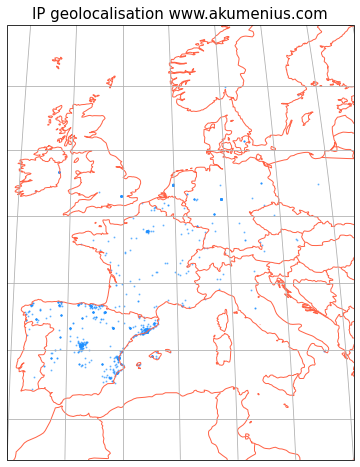

In [20]:
# Plot geolocalisation only Europe
fig = plt.figure(figsize=(14,8))

ax = fig.add_subplot(1,1,1, projection=crs.Robinson())

ax.set_global()
ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=europe.longitude, y=europe.latitude,
            color="dodgerblue",
            s=1,
            alpha=0.5,
            transform=crs.PlateCarree()) ## Important

ax.set_extent([-10, 20, 65, 32],
              crs=crs.PlateCarree()) ## Important

plt.title("IP geolocalisation www.akumenius.com", loc='center',fontsize = 15)

plt.show()